<a href="https://colab.research.google.com/github/devchh/MRI-Pi/blob/main/Diffusion_Tensor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
import os

!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version

file is already the newest version (1:5.41-3ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-05-09 19:51:54--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74517 (73K) [application/octet-stream]
Saving to: ‘fslinstaller.py’

fslinstaller.py     100%[===================>]  72.77K   279KB/s    in 0.3s    

2024-05-09 19:51:55 (279 KB/s) - ‘fslinstaller.py’ saved [74517/74517]

/bin/bash: line 1: python2: command not found
/bin/bash: line 1: /usr/local/fsl/etc/fslconf/fsl.sh: No such file or directory
/bin/bash: line 1: flirt: command not found


In [ ]:
!python fslinstaller.py

FSL installer version: 3.2.0
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a regular user - you will be asked for your administrator password if required.
Installation log file: /tmp/fslinstaller_5216hlmq.log

FSL installer version: 3.9.0
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a
regular user - you will be asked for your administrator password if required.
Installation log file: /tmp/fslinstaller_4n3sxhi_.log

Installing FSL implies agreement with the terms of the FSL license - if you do not agree with
these terms, you can cancel the installation by pressing CTRL+C. You can view the license
at https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Licence

During the installation process, please note that some system details will be automatically
sent to the FSL development team. These details are extremely basic and c

In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

#For Fslutils:
# remember to go into this directory before starting: cd $FSLDIR/etc/fslconf
# and then do this: source fsl.sh
# use this before executing the fslsplit command -> source usr/local/fsl/etc/fslconf/fsl.sh

#For Mrtrix:
#This info will help you add the path to the .bashrc file

#cd ~
#vim .bashrc
#export PATH="/content/drive/MyDrive/mrtrix3/bin:$PATH"
#source ~/.bashrc
#chmod -R +x /content/drive/MyDrive/mrtrix3/bin
#use dwi2tensor -fslgrad bvecs bvals data.nii.gz dt.nii.gz


The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>

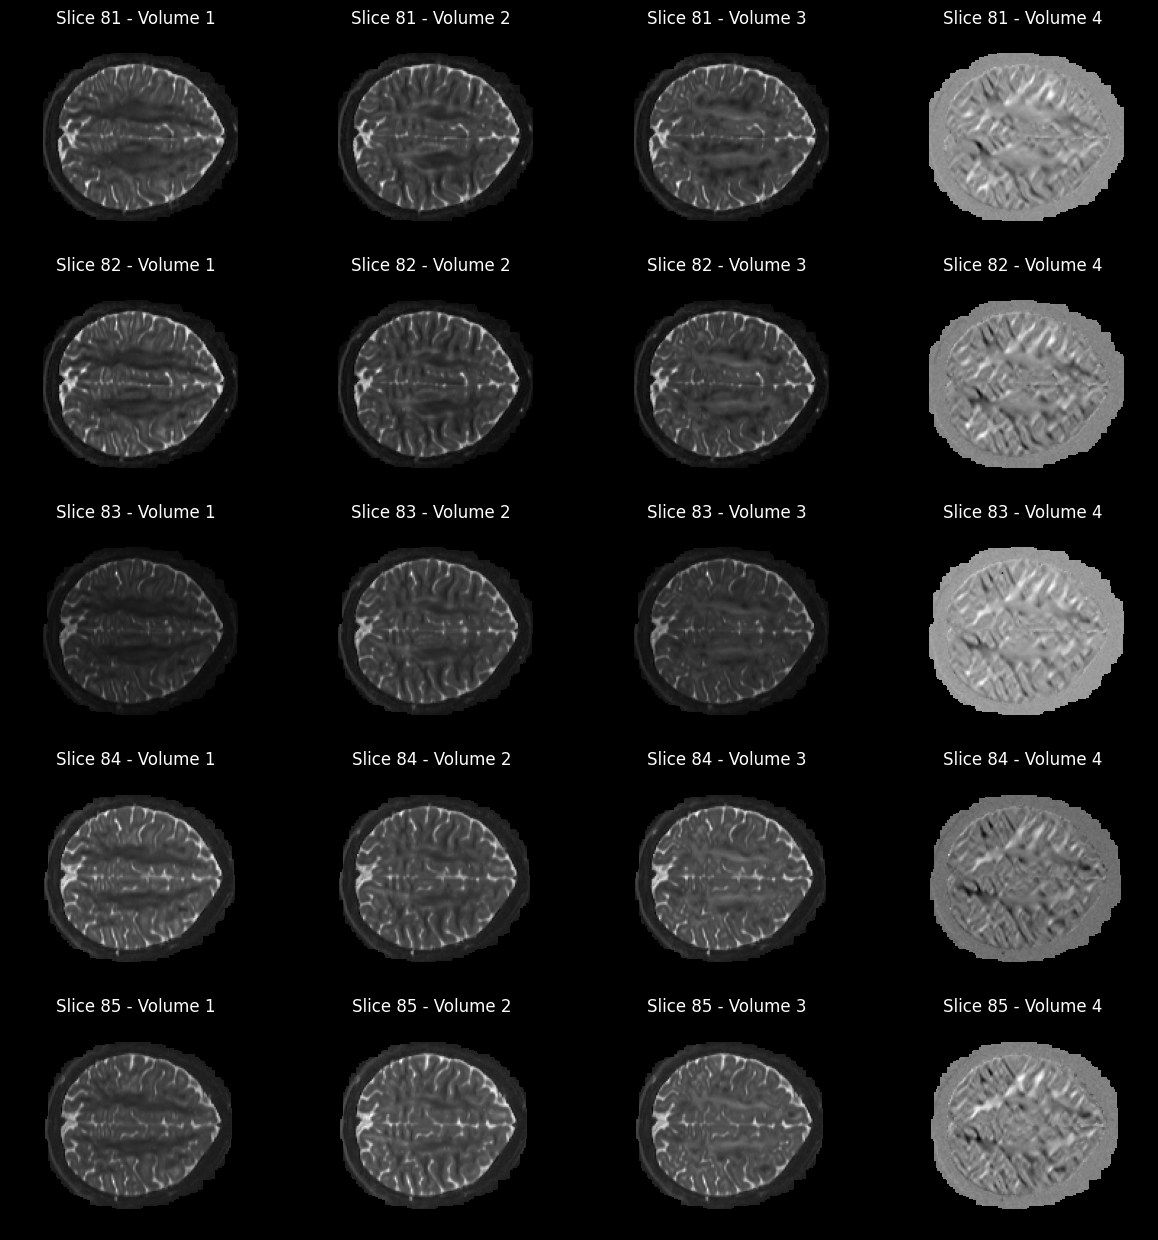

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import os

# Define the directory containing the split slices
directory = "/content/drive/MyDrive/Colab Notebooks/100307/T1w/Diffusion/split/"

# Define the range of slices and the number of volumes to display
start_slice = 81
num_slices = 5
num_volumes = 4  # Change this number based on your requirement

# Plotting
plt.style.use('dark_background')

# Display the range of slices
fig, axes = plt.subplots(num_slices, num_volumes, figsize=(3 * num_volumes, 2.5 * num_slices))
for i in range(num_slices):
    # Determine the slice index
    slice_index = start_slice + i

    # Construct the file path for the current slice
    file_path = os.path.join(directory, f"vol{slice_index:04d}.nii.gz")

    # Load the current slice
    tdt_img = nib.load(file_path)
    tdt_data = tdt_img.get_fdata()

    # Display the specified number of volumes for the current slice
    for j in range(num_volumes):
        volume = tdt_data[..., j]
        axes[i, j].imshow(volume, cmap='gray') #You can pick between gray, hot, cold, RGB, inferno, viridus etc)
        axes[i, j].set_title(f'Slice {slice_index} - Volume {j+1}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
